In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('data/preprocessed_rapido_dataset.csv')

In [37]:
df.head()

,booking_id,day_of_week,is_weekend,hour_of_day,city,pickup_location,drop_location,vehicle_type,ride_distance_km,estimated_ride_time_min,...,avg_surge_multiplier,demand_level,peak_hour_flag,fare_per_km,fare_per_min,long_distance_flag,city_pair,driver_reliability_score,customer_loyalty_score,booking_datetime
0,B_000001,Thursday,0,0,Mumbai,Loc_19,Loc_16,Bike,7.01,46.30,...,1.52,Low,0,21.14,3.20,0,Loc_19_Loc_16,92.44,82.20,2025-12-11 00:07:00
1,B_000002,Monday,0,6,Mumbai,Loc_32,Loc_38,Cab,9.67,43.54,...,1.58,Low,0,48.17,10.70,0,Loc_32_Loc_38,87.14,98.80,2025-07-07 06:13:00
2,B_000003,Saturday,1,8,Chennai,Loc_28,Loc_1,Auto,16.18,48.55,...,1.69,Medium,1,28.25,9.41,0,Loc_28_Loc_1,84.22,46.47,2025-08-23 08:53:00
3,B_000004,Saturday,1,10,Delhi,Loc_16,Loc_30,Bike,1.02,4.61,...,1.57,Low,1,50.03,11.07,0,Loc_16_Loc_30,82.00,75.71,2025-04-12 10:25:00
4,B_000005,Saturday,1,0,Hyderabad,Loc_22,Loc_31,Bike,12.35,55.56,...,1.40,Medium,0,11.72,2.60,0,Loc_22_Loc_31,87.43,89.91,2025-08-23 00:08:00


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   booking_id                100000 non-null  object 
 1   day_of_week               100000 non-null  object 
 2   is_weekend                100000 non-null  int64  
 3   hour_of_day               100000 non-null  int64  
 4   city                      100000 non-null  object 
 5   pickup_location           100000 non-null  object 
 6   drop_location             100000 non-null  object 
 7   vehicle_type              100000 non-null  object 
 8   ride_distance_km          100000 non-null  float64
 9   estimated_ride_time_min   100000 non-null  float64
 10  actual_ride_time_min      100000 non-null  float64
 11  traffic_level             100000 non-null  object 
 12  weather_condition         100000 non-null  object 
 13  booking_value             100000 non-null  fl

# Exploratory Data Analysis
1. Ride volume by hour, weekday, city
2. Cancellation heatmap across cities
3. Distance vs Fare correlation
4. Rating Distribution
5. Customer vs Driver behaviour comparison
6. payment method usage patterns
7. Traffic/Weather vs Cancellation

day_of_week
Wednesday    14558
Friday       14411
Thursday     14336
Sunday       14245
Saturday     14182
Monday       14159
Tuesday      14109
Name: count, dtype: int64


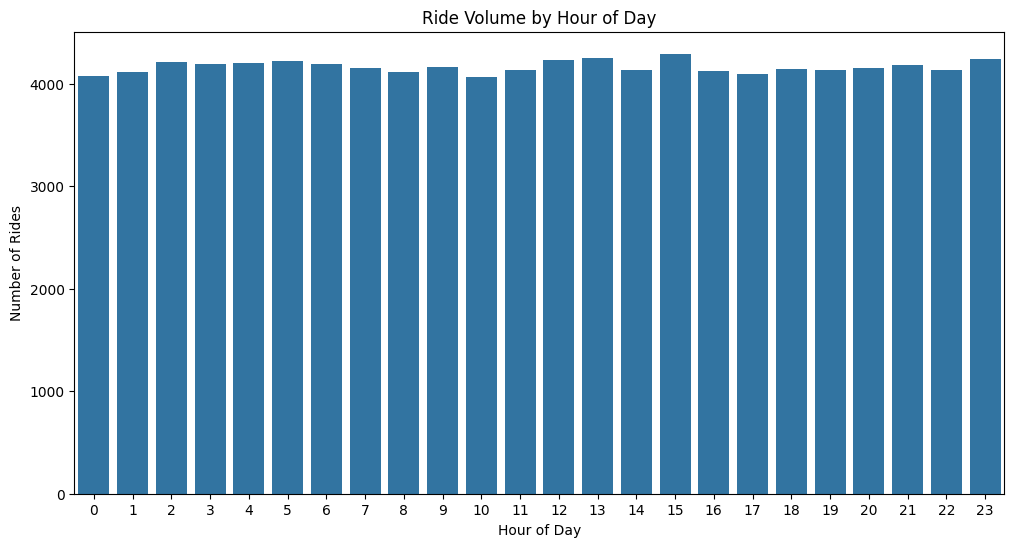

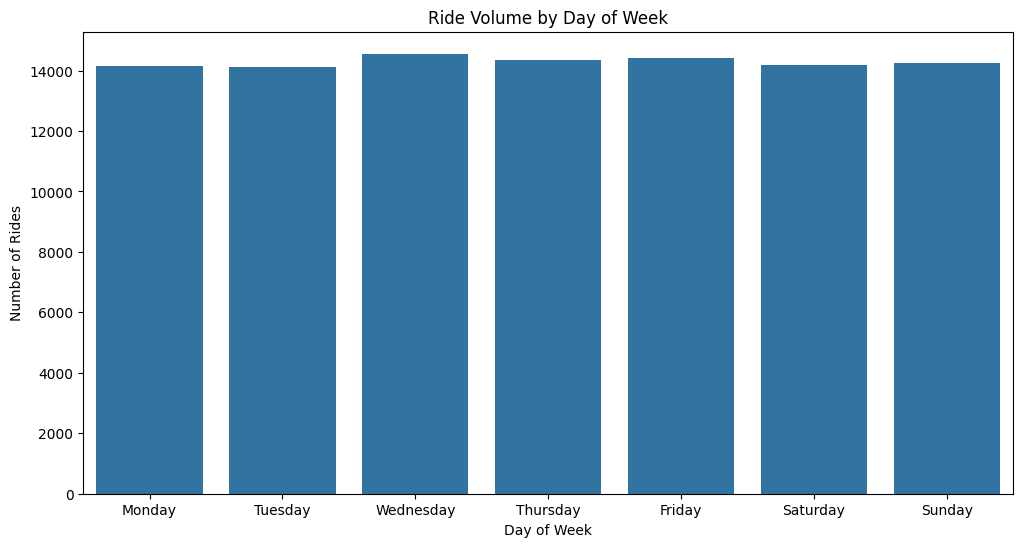

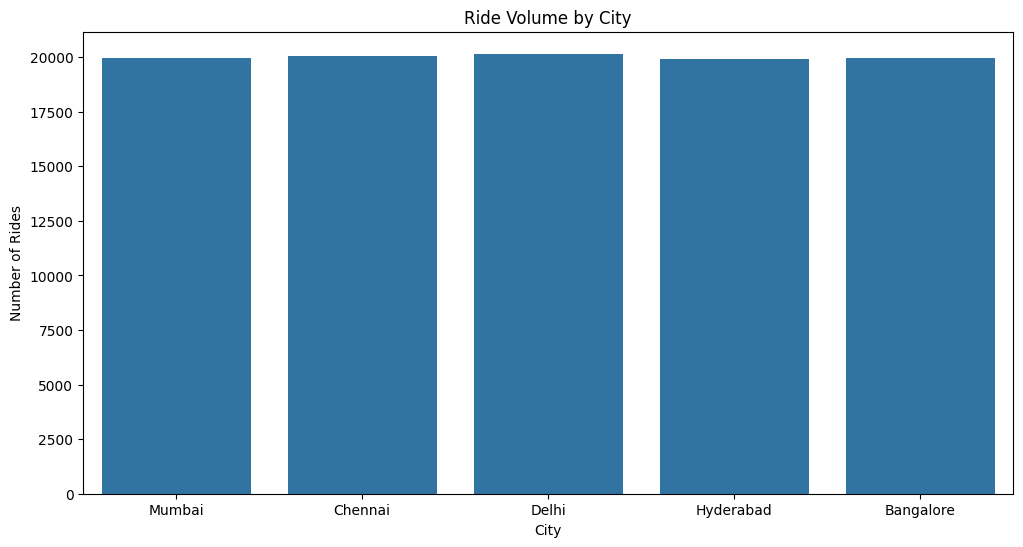

In [55]:
# Ride Volume by hour, weekday and city
ride_volume = df.groupby(['hour_of_day', 'day_of_week', 'city']).size().reset_index(name='ride_count')
ride_volume.head()

print(df['day_of_week'].value_counts())

# Plotting ride volume by hour of day
plt.figure(figsize=(12, 6))
sns.countplot(x='hour_of_day', data=df)
plt.title('Ride Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

# Plotting ride volume by day of week
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ride Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.show()

# Plotting ride volume by city
plt.figure(figsize=(12, 6))
sns.countplot(x='city', data=df)
plt.title('Ride Volume by City')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.show()

In [59]:
df['booking_status'].value_counts()

booking_status
Completed     68346
Cancelled     23284
Incomplete     8370
Name: count, dtype: int64

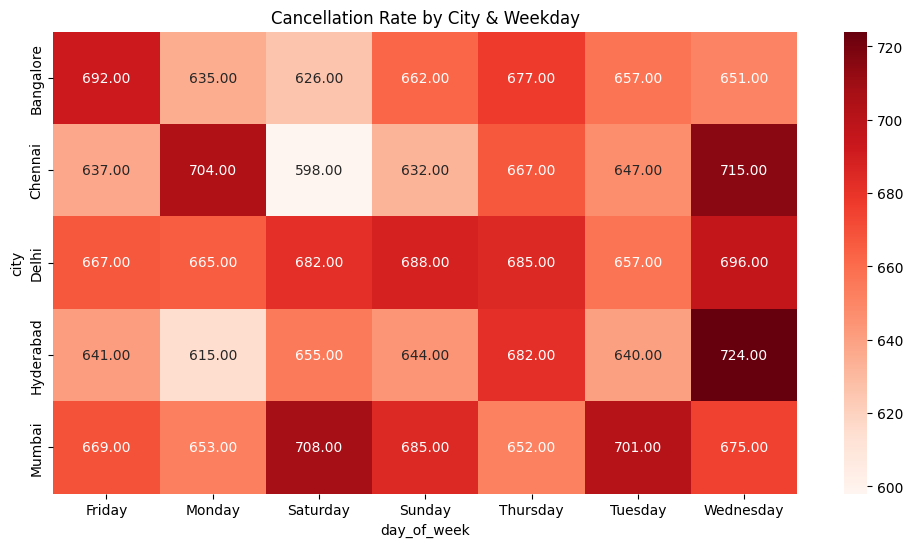

In [61]:
# Cancellation heatmap across cities

cancelled_df = df[df['booking_status'] == 'Cancelled']
cancel_count = cancelled_df.groupby('city').size().reset_index(name='cancel_count')

# Plotting cancellation count by city using heatmap
pivot = df.pivot_table(
    values='booking_status',
    index='city',
    columns='day_of_week',
    aggfunc=lambda x: (x == 'Cancelled').sum()
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='Reds')
plt.title('Cancellation Rate by City & Weekday')
plt.show()

Correlation: 0.668


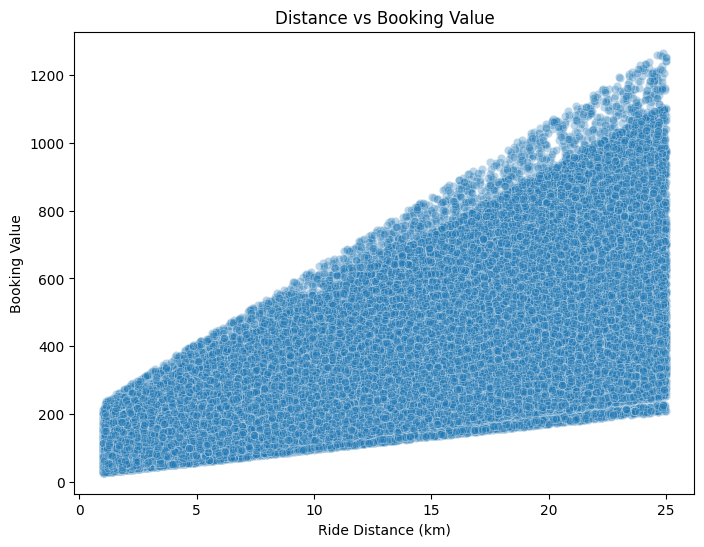

In [ ]:
# Distance vs Fare correlation
corr_value = df['ride_distance_km'].corr(df['booking_value'])
print("Correlation:", round(corr_value, 3))
# Positive correlation indicates that longer rides tend to have higher booking values.

plt.figure(figsize=(8,6))
sns.scatterplot(x='ride_distance_km', y='booking_value', data=df, alpha=0.3)
plt.title('Distance vs Booking Value')
plt.xlabel('Ride Distance (km)')
plt.ylabel('Booking Value')
plt.show()

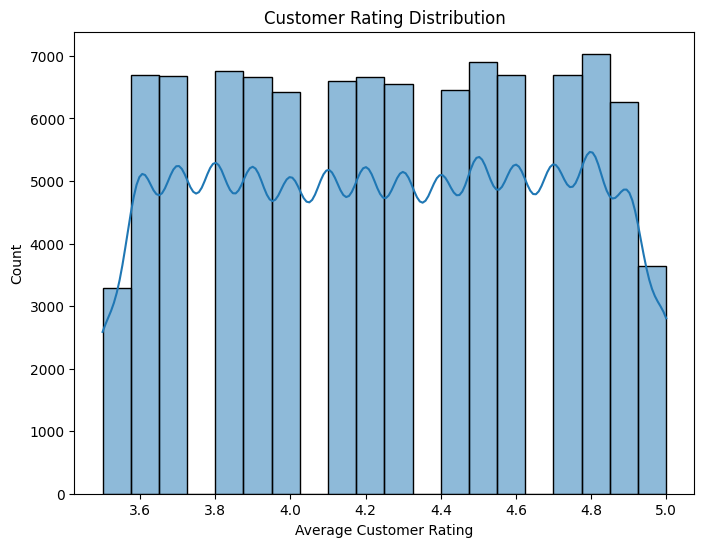

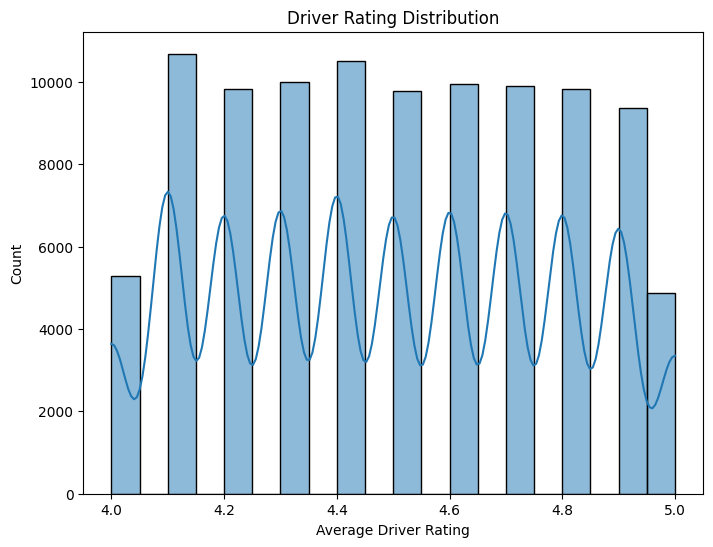

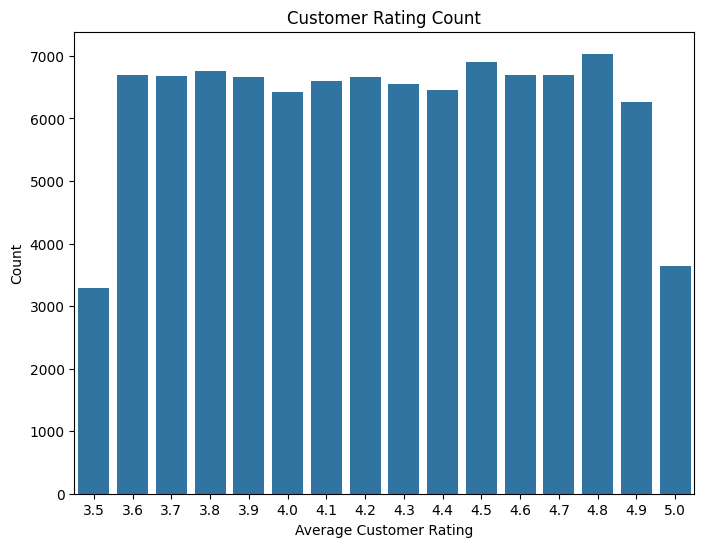

In [66]:
# Rating distribution

plt.figure(figsize=(8,6))
sns.histplot(df['avg_customer_rating'], bins=20, kde=True)
plt.title('Customer Rating Distribution')
plt.xlabel('Average Customer Rating')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(df['avg_driver_rating'], bins=20, kde=True)
plt.title('Driver Rating Distribution')
plt.xlabel('Average Driver Rating')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8,6))
sns.countplot(x='avg_customer_rating', data=df)
plt.title('Customer Rating Count')
plt.xlabel('Average Customer Rating')
plt.ylabel('Count')
plt.show()

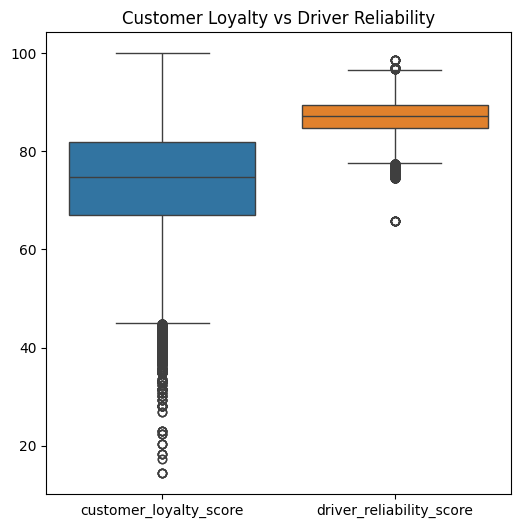

In [69]:
#Customer vs Driver behaviour comparison
plt.figure(figsize=(6,6))
sns.boxplot(data=df[['customer_loyalty_score','driver_reliability_score']])
plt.title('Customer Loyalty vs Driver Reliability')
plt.show()

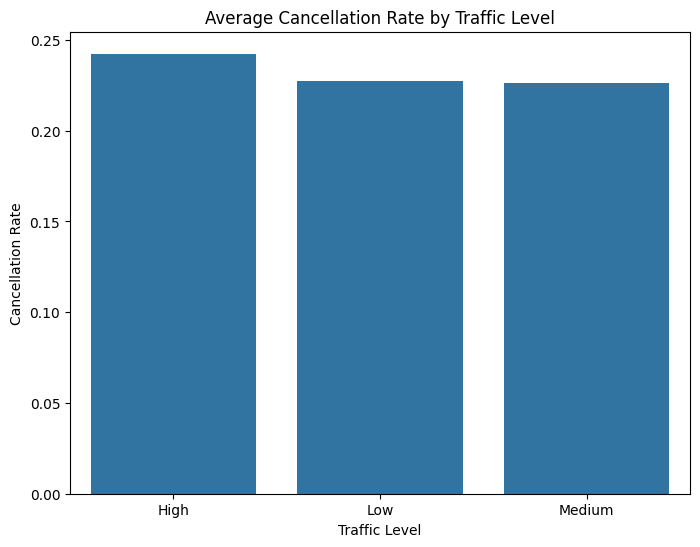

In [70]:
# Traffic level vs Cancellation
traffic_cancel = df.groupby('traffic_level')['cancellation_rate'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='traffic_level', y='cancellation_rate', data=traffic_cancel)
plt.title('Average Cancellation Rate by Traffic Level')
plt.ylabel('Cancellation Rate')
plt.xlabel('Traffic Level')
plt.show()